In [86]:
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
import sys
import ase
from ase.units import Hartree, kcal, mol

sys.path.append("/cluster/home/schmidtn/master/wahlprak/dftmp2bench")

from dftmp2bench.pareto import is_pareto_efficient



In [254]:

FONTSIZE = 15

HF_color = "maroon"
GGADFT_color = "lightred"
MGGADFT_color = "orange"
HDFT_color = "chartreuse"
DHDFT_color = "forestgreen"
MP_color = "wheat"
CC_color = "gold"
###
HF=  "HF" 
GGADFT=  "GGADFT" 
MGGADFT=  "MGGADFT" 
HDFT=  "HDFT" 
DHDFT=  "DHDFT"
MP=  "MP" 
CC=  "CC" 
####
HF_marker = "o"
GGADFT_marker = "t"
MGGADFT_marker = "s"
HDFT_marker = "p"
DHDFT_marker = "h"
MP_marker = "P"
CC_marker = "*"
####
main_pareto_front_color = "black"
main_pareto_line_style = "--"
####
style_dict = {
'wb97xd3': (HDFT_marker, HDFT_color),
    'camb3lyp': (HDFT_marker, HDFT_color),
    'dlpnoccsdt': (CC_marker, CC_color),
    'r2scan-3c': (MGGADFT_marker,MGGADFT_color),
    'wb97xd3bj': (HDFT_marker, HDFT_color),
       'pbe0': (HDFT_marker, HDFT_color),
    'hf': (HF_marker, HF_color),
    'PBEh-3c': (HDFT_marker, HDFT_color),
    'b2plyp': (DHDFT_marker, DHDFT_color), 
    'rimp2': (MP_marker, MP_color),
    'm062x': (HDFT_marker, HDFT_color),
    'wb97xv': (HDFT_marker, HDFT_color),
       'b973c': (HDFT_marker, HDFT_color),
    'ccsd': (CC_marker, CC_color),
    'mp2': (MP_marker, MP_color),
}
####
lot_type_dict = {
'wb97xd3': HDFT,
    'camb3lyp': HDFT,
    'dlpnoccsdt': CC,
    'r2scan-3c': MGGADFT,
    'wb97xd3bj': HDFT,
       'pbe0': HDFT,
    'hf': HF,
    'PBEh-3c': HDFT,
    'b2plyp': DHDFT,
    'rimp2': MP,
    'm062x': HDFT,
    'wb97xv': HDFT,
       'b973c': HDFT,
    'ccsd': CC,
    'mp2': MP,
}
###
theory_type_style_dict = {
    'MGGADFT': (MGGADFT_marker,MGGADFT_color),
    'HF': (HF_marker, HF_color),
    'DHDFT': (DHDFT_marker, DHDFT_color), 
       'HDFT': (HDFT_marker, HDFT_color),
    'CC': (CC_marker, CC_color),
    'MP': (MP_marker, MP_color),
}



In [87]:
project_path = Path("/cluster/home/schmidtn/master/wahlprak/dftmp2bench")
csv_path = project_path / "OutputSummary-2025-01-27.csv"


# REF_ENERGY = -25420.402056 # TODO: change

In [88]:
REF_LOT = "mp2"
REF_BASIS = "6311++g2d2p"

q = (
    pl.scan_csv(csv_path)
    # .filter(pl.col("sepal_length") > 5)
    # .group_by("species")
    # .agg(pl.all().sum())
)

df = q.collect()

REF_ENERGY = df.filter(
    (pl.col("level_of_theory") == REF_LOT) & (pl.col("basis") == REF_BASIS ) #& pl.col("basis").str.contains("\+\+") 
)["energy"][0]
REF_ENERGY

-25420.402056297025

In [93]:
df.filter(
    (pl.col("level_of_theory") == "mp2") & (pl.col("nbasis") > 0) #& pl.col("basis").str.contains("\+\+") 
)

name,software,wall_time,basis,level_of_theory,energy,nbasis,unsigned_error,signed_error,relative_wall_time,unsigned_error_kcalmol,signed_error_kcalmol
str,str,f64,str,str,f64,i64,f64,f64,f64,f64,f64
"""/cluster/home/schmidtn/master/…","""gaussian""",2918.1,"""631+gd""","""mp2""",-25399.533512,407,20.868544,20.868544,0.201291,481.240069,481.240069
"""/cluster/home/schmidtn/master/…","""gaussian""",3371.0,"""631+gdp""","""mp2""",-25404.72798,476,15.674076,15.674076,0.232532,361.452789,361.452789
"""/cluster/home/schmidtn/master/…","""gaussian""",14496.9,"""6311++g2d2p""","""mp2""",-25420.402056,743,0.0,0.0,1.0,0.0,0.0
"""/cluster/home/schmidtn/master/…","""gaussian""",2630.6,"""ccpvdz""","""mp2""",-25403.942634,381,16.459423,16.459423,0.181459,379.563307,379.563307
"""/cluster/home/schmidtn/master/…","""gaussian""",2396.9,"""def2svp""","""mp2""",-25382.873759,381,37.528297,37.528297,0.165339,865.423094,865.423094
…,…,…,…,…,…,…,…,…,…,…,…
"""/cluster/home/schmidtn/master/…","""orca""",3504.78,"""631+gdp""","""mp2""",-25403.788787,457,16.613269,16.613269,0.241761,383.111098,383.111098
"""/cluster/home/schmidtn/master/…","""orca""",1800.677,"""ccpvdz""","""mp2""",-25403.943883,381,16.458173,16.458173,0.124211,379.534485,379.534485
"""/cluster/home/schmidtn/master/…","""orca""",1452.809,"""def2svp""","""mp2""",-25382.874663,381,37.527394,37.527394,0.100215,865.402263,865.402263


In [218]:
df = df.sort(["software", "level_of_theory", "basis"])

df = df.with_columns(
    unsigned_error=abs(pl.col("energy") - REF_ENERGY),
    signed_error=pl.col("energy") - REF_ENERGY,
    relative_wall_time= pl.col("wall_time") / 14496.9,
)

theory_type = [lot_type_dict[_] for _ in df["level_of_theory"]]
df = df.with_columns(theory_type = theory_type
)

df = df.with_columns(
    unsigned_error_kcalmol = pl.col("unsigned_error") / (kcal/mol),
    signed_error_kcalmol = pl.col("signed_error") / (kcal/mol)
)

df

name,software,wall_time,basis,level_of_theory,energy,nbasis,unsigned_error,signed_error,relative_wall_time,unsigned_error_kcalmol,signed_error_kcalmol,theory_type
str,str,f64,str,str,f64,i64,f64,f64,f64,f64,f64,list[str]
"""/cluster/home/schmidtn/master/…","""gaussian""",4392.6,"""631+gd""","""b2plyp""",-25425.492624,407,5.090568,-5.090568,0.303003,117.391276,-117.391276,"[""DHDFT"", ""DHDFT"", … ""HDFT""]"
"""/cluster/home/schmidtn/master/…","""gaussian""",5007.3,"""631+gdp""","""b2plyp""",-25426.77686,476,6.374804,-6.374804,0.345405,147.006478,-147.006478,"[""DHDFT"", ""DHDFT"", … ""HDFT""]"
"""/cluster/home/schmidtn/master/…","""gaussian""",19182.6,"""6311++g2d2p""","""b2plyp""",-25433.065681,743,12.663625,-12.663625,1.323221,292.030127,-292.030127,"[""DHDFT"", ""DHDFT"", … ""HDFT""]"
"""/cluster/home/schmidtn/master/…","""gaussian""",3668.2,"""ccpvdz""","""b2plyp""",-25426.541292,381,6.139236,-6.139236,0.253033,141.574138,-141.574138,"[""DHDFT"", ""DHDFT"", … ""HDFT""]"
"""/cluster/home/schmidtn/master/…","""gaussian""",3120.1,"""def2svp""","""b2plyp""",-25406.254485,381,14.147572,14.147572,0.215225,326.250755,326.250755,"[""DHDFT"", ""DHDFT"", … ""HDFT""]"
…,…,…,…,…,…,…,…,…,…,…,…,…
"""/cluster/home/schmidtn/master/…","""orca""",4636.984,"""ccpvtzf12""","""wb97xv""",-25481.633995,1421,61.231938,-61.231938,0.31986,1412.042058,-1412.042058,"[""DHDFT"", ""DHDFT"", … ""HDFT""]"
"""/cluster/home/schmidtn/master/…","""orca""",668.147,"""def2svp""","""wb97xv""",-25451.98964,381,31.587584,-31.587584,0.046089,728.426991,-728.426991,"[""DHDFT"", ""DHDFT"", … ""HDFT""]"
"""/cluster/home/schmidtn/master/…","""orca""",1378.334,"""def2svpd""","""wb97xv""",-25454.015023,576,33.612966,-33.612966,0.095078,775.133422,-775.133422,"[""DHDFT"", ""DHDFT"", … ""HDFT""]"


In [222]:
def func2(x):
    return lot_type_dict[x]


df = df.with_columns(theory_type = pl.col("level_of_theory").replace_strict(lot_type_dict)
)
# df[["level_of_theory", "theory_type"]].unique()
df

name,software,wall_time,basis,level_of_theory,energy,nbasis,unsigned_error,signed_error,relative_wall_time,unsigned_error_kcalmol,signed_error_kcalmol,theory_type
str,str,f64,str,str,f64,i64,f64,f64,f64,f64,f64,str
"""/cluster/home/schmidtn/master/…","""gaussian""",4392.6,"""631+gd""","""b2plyp""",-25425.492624,407,5.090568,-5.090568,0.303003,117.391276,-117.391276,"""DHDFT"""
"""/cluster/home/schmidtn/master/…","""gaussian""",5007.3,"""631+gdp""","""b2plyp""",-25426.77686,476,6.374804,-6.374804,0.345405,147.006478,-147.006478,"""DHDFT"""
"""/cluster/home/schmidtn/master/…","""gaussian""",19182.6,"""6311++g2d2p""","""b2plyp""",-25433.065681,743,12.663625,-12.663625,1.323221,292.030127,-292.030127,"""DHDFT"""
"""/cluster/home/schmidtn/master/…","""gaussian""",3668.2,"""ccpvdz""","""b2plyp""",-25426.541292,381,6.139236,-6.139236,0.253033,141.574138,-141.574138,"""DHDFT"""
"""/cluster/home/schmidtn/master/…","""gaussian""",3120.1,"""def2svp""","""b2plyp""",-25406.254485,381,14.147572,14.147572,0.215225,326.250755,326.250755,"""DHDFT"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""/cluster/home/schmidtn/master/…","""orca""",4636.984,"""ccpvtzf12""","""wb97xv""",-25481.633995,1421,61.231938,-61.231938,0.31986,1412.042058,-1412.042058,"""HDFT"""
"""/cluster/home/schmidtn/master/…","""orca""",668.147,"""def2svp""","""wb97xv""",-25451.98964,381,31.587584,-31.587584,0.046089,728.426991,-728.426991,"""HDFT"""
"""/cluster/home/schmidtn/master/…","""orca""",1378.334,"""def2svpd""","""wb97xv""",-25454.015023,576,33.612966,-33.612966,0.095078,775.133422,-775.133422,"""HDFT"""


In [223]:
df[["software", "level_of_theory", "basis", "wall_time", "energy", "unsigned_error"]]

software,level_of_theory,basis,wall_time,energy,unsigned_error
str,str,str,f64,f64,f64
"""gaussian""","""b2plyp""","""631+gd""",4392.6,-25425.492624,5.090568
"""gaussian""","""b2plyp""","""631+gdp""",5007.3,-25426.77686,6.374804
"""gaussian""","""b2plyp""","""6311++g2d2p""",19182.6,-25433.065681,12.663625
"""gaussian""","""b2plyp""","""ccpvdz""",3668.2,-25426.541292,6.139236
"""gaussian""","""b2plyp""","""def2svp""",3120.1,-25406.254485,14.147572
…,…,…,…,…,…
"""orca""","""wb97xv""","""ccpvtzf12""",4636.984,-25481.633995,61.231938
"""orca""","""wb97xv""","""def2svp""",668.147,-25451.98964,31.587584
"""orca""","""wb97xv""","""def2svpd""",1378.334,-25454.015023,33.612966


In [224]:
df["level_of_theory"].unique().to_numpy()

array(['mp2', 'm062x', 'pbe0', 'PBEh-3c', 'r2scan-3c', 'dlpnoccsdt',
       'wb97xd3bj', 'camb3lyp', 'b973c', 'rimp2', 'wb97xd3', 'ccsd',
       'b2plyp', 'hf', 'wb97xv'], dtype=object)

In [225]:
df["basis"].unique()

basis
str
"""6311++g2d2p"""
"""sto3g"""
"""631+gd"""
"""def2svp"""
"""def2svpd"""
"""ccpvtzf12"""
"""ccpvdzpp"""
"""ccpvdz"""
"""def2tzvpp"""


In [226]:
df["nbasis"].describe()

statistic,value
str,f64
"""count""",148.0
"""null_count""",0.0
"""mean""",514.52027
"""std""",286.33479
"""min""",118.0
"""25%""",381.0
"""50%""",450.0
"""75%""",576.0
"""max""",1421.0


In [227]:
is_pareto_efficient?

Signature: is_pareto_efficient(costs, return_mask=True)
Docstring:
Find the pareto-efficient points
:param costs: An (n_points, n_costs) array
:param return_mask: True to return a mask
:return: An array of indices of pareto-efficient points.
    If return_mask is True, this will be an (n_points, ) boolean array
    Otherwise it will be a (n_efficient_points, ) integer array of indices.
File:      ~/master/wahlprak/dftmp2bench/dftmp2bench/pareto.py
Type:      function

In [228]:
pareto_front.sort(["relative_wall_time", "unsigned_error_kcalmol"])

name,software,wall_time,basis,level_of_theory,energy,nbasis,unsigned_error,signed_error,relative_wall_time,unsigned_error_kcalmol,signed_error_kcalmol
str,str,f64,str,str,f64,i64,f64,f64,f64,f64,f64
"""/cluster/home/schmidtn/master/…","""gaussian""",13.7,"""sto3g""","""hf""",-24999.642933,118,420.759123,420.759123,0.000945,9702.93596,9702.93596
"""/cluster/home/schmidtn/master/…","""gaussian""",19.5,"""sto3g""","""mp2""",-25027.014006,118,393.38805,393.38805,0.001345,9071.744023,9071.744023
"""/cluster/home/schmidtn/master/…","""gaussian""",162.0,"""sto3g""","""b2plyp""",-25097.92736,118,322.474696,322.474696,0.011175,7436.443213,7436.443213
"""/cluster/home/schmidtn/master/…","""gaussian""",195.9,"""sto3g""","""camb3lyp""",-25133.97434,118,286.427716,286.427716,0.013513,6605.180093,6605.180093
"""/cluster/home/schmidtn/master/…","""orca""",278.528,"""sto3g""","""b973c""",-25466.433325,450,46.031269,-46.031269,0.019213,1061.506279,-1061.506279
"""/cluster/home/schmidtn/master/…","""orca""",440.049,"""def2svp""","""m062x""",-25447.339811,381,26.937754,-26.937754,0.030355,621.199377,-621.199377
"""/cluster/home/schmidtn/master/…","""orca""",542.433,"""def2svp""","""pbe0""",-25430.438628,381,10.036572,-10.036572,0.037417,231.448854,-231.448854
"""/cluster/home/schmidtn/master/…","""orca""",574.798,"""631+gd""","""PBEh-3c""",-25422.929484,331,2.527428,-2.527428,0.03965,58.283866,-58.283866
"""/cluster/home/schmidtn/master/…","""gaussian""",14496.9,"""6311++g2d2p""","""mp2""",-25420.402056,743,0.0,0.0,1.0,0.0,0.0


MP
HDFT
CC
DHDFT
HF
MGGADFT
!!!


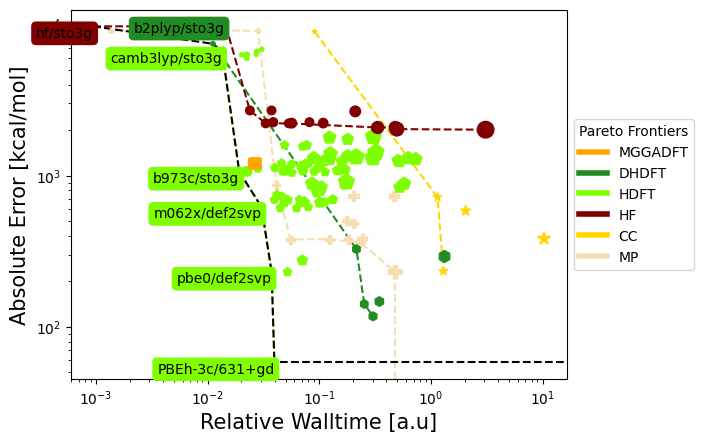

In [323]:

for v in df["theory_type"].unique():
    print(v)

    _df = _df.filter(
                 ~(pl.col("basis") == REF_BASIS) & (pl.col("level_of_theory") == REF_LOT)
            )

    _df = df.filter((pl.col("theory_type") == v))
    # print(_df)
    plt.scatter(_df["relative_wall_time"], _df["unsigned_error_kcalmol"],
                s=(_df["nbasis"])/10,
                c=theory_type_style_dict[v][1],
                marker=theory_type_style_dict[v][0],
               )

    _pf = _df.filter(
        is_pareto_efficient(
            _df[["unsigned_error_kcalmol", "wall_time"]].to_numpy())
    ).sort(["relative_wall_time", "unsigned_error_kcalmol"])
    # print(_pf, color)
    plt.plot(_pf["relative_wall_time"], 
             _pf["unsigned_error_kcalmol"], 
             zorder=-1,
             linestyle=main_pareto_line_style,
            c=theory_type_style_dict[v][1],
             alpha=1,
            )


values_to_compare = df.filter(
                 (pl.col("basis") != REF_BASIS) & (pl.col("level_of_theory") != lot)
            )

values_to_compare_pf = values_to_compare.filter(
    is_pareto_efficient(
        values_to_compare[["unsigned_error_kcalmol", "wall_time"]].to_numpy())
).sort(["relative_wall_time", "unsigned_error_kcalmol"])

plt.plot(values_to_compare_pf["relative_wall_time"], 
         values_to_compare_pf["unsigned_error_kcalmol"], 
         zorder=-1,
         linestyle=main_pareto_line_style,
        c=main_pareto_front_color,
         alpha=1,
        )




min_USEkcalmol = min(values_to_compare_pf["unsigned_error_kcalmol"])

min_USEkcalmol_rel_wall_time = values_to_compare_pf.filter(pl.col("unsigned_error_kcalmol") == min_USEkcalmol)["relative_wall_time"][0]

ax = plt.gca()



for _ in values_to_compare_pf.iter_rows():
    shift_ = 0
    if _[-1] == "DHDFT":
        print("!!!")
        shift_ = 0.3
    
    ax.text(_[-4] + shift_/100, _[-3] + shift_*10**4, f"{_[4]}/{_[3]}", 
            horizontalalignment='right',
            verticalalignment='top',
            bbox=dict(boxstyle="round",
                   ec=theory_type_style_dict[_[-1]][1],
                   fc=theory_type_style_dict[_[-1]][1],
                     )
           )

ax.set_xscale("log")
ax.axhline(min_USEkcalmol, xmin=0.422, xmax=1, zorder=-1,
           linestyle=main_pareto_line_style,
        c=main_pareto_front_color,
           alpha=1,
        )



ax.set_yscale("log")
ax.set_xlabel("Relative Walltime [a.u]", fontsize=FONTSIZE)
ax.set_ylabel("Absolute Error [kcal/mol]", fontsize=FONTSIZE)

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements = [Line2D([0], [0], color=theory_type_style_dict[v][1], lw=4, label=v) for v in df["theory_type"].unique()]
# # Create the figure
# fig, ax = plt.subplots()
ax.legend(handles=legend_elements, title="Pareto Frontiers", loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("test.pdf")

In [258]:
values_to_compare_pf

name,software,wall_time,basis,level_of_theory,energy,nbasis,unsigned_error,signed_error,relative_wall_time,unsigned_error_kcalmol,signed_error_kcalmol,theory_type
str,str,f64,str,str,f64,i64,f64,f64,f64,f64,f64,str
"""/cluster/home/schmidtn/master/…","""gaussian""",13.7,"""sto3g""","""hf""",-24999.642933,118,420.759123,420.759123,0.000945,9702.93596,9702.93596,"""HF"""
"""/cluster/home/schmidtn/master/…","""gaussian""",162.0,"""sto3g""","""b2plyp""",-25097.92736,118,322.474696,322.474696,0.011175,7436.443213,7436.443213,"""DHDFT"""
"""/cluster/home/schmidtn/master/…","""gaussian""",195.9,"""sto3g""","""camb3lyp""",-25133.97434,118,286.427716,286.427716,0.013513,6605.180093,6605.180093,"""HDFT"""
"""/cluster/home/schmidtn/master/…","""orca""",278.528,"""sto3g""","""b973c""",-25466.433325,450,46.031269,-46.031269,0.019213,1061.506279,-1061.506279,"""HDFT"""
"""/cluster/home/schmidtn/master/…","""orca""",440.049,"""def2svp""","""m062x""",-25447.339811,381,26.937754,-26.937754,0.030355,621.199377,-621.199377,"""HDFT"""
"""/cluster/home/schmidtn/master/…","""orca""",542.433,"""def2svp""","""pbe0""",-25430.438628,381,10.036572,-10.036572,0.037417,231.448854,-231.448854,"""HDFT"""
"""/cluster/home/schmidtn/master/…","""orca""",574.798,"""631+gd""","""PBEh-3c""",-25422.929484,331,2.527428,-2.527428,0.03965,58.283866,-58.283866,"""HDFT"""


##### plt.plot(values_to_compare_pf["relative_wall_time"], values_to_compare_pf["unsigned_error_kcalmol"])


In [142]:
values_to_compare_pf

name,software,wall_time,basis,level_of_theory,energy,nbasis,unsigned_error,signed_error,relative_wall_time,unsigned_error_kcalmol,signed_error_kcalmol
str,str,f64,str,str,f64,i64,f64,f64,f64,f64,f64
"""/cluster/home/schmidtn/master/…","""gaussian""",14496.9,"""6311++g2d2p""","""mp2""",-25420.402056,743,0.0,0.0,1.0,0.0,0.0
